In [1]:
import pandas as pd
from pandas.plotting import radviz
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
#import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm, preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from pandas import DataFrame

In [2]:
def read(file):
    return pd.read_csv(file)

#features.set_index(['Index'], inplace = True)
#features.drop(columns = ['Index'], inplace = True)

features = read('unique_best_features.csv')
features.head(5)

,n [count],H [mm],b [mm],d [mm],γ [N/mm3],Pmax [N],P0 [N]
0,3,90.0,19.4114,5.0,0.000016,9.080644,0.046939
1,3,90.0,12.9410,5.0,0.000016,8.758713,0.154249
2,6,90.0,19.4114,5.0,0.000016,11.753734,0.720029
3,6,90.0,12.9410,5.0,0.000016,10.797683,1.032218
4,F,90.0,19.4114,5.0,0.000016,14.095079,2.017568


In [3]:
def print_shape(data):
    print("The shape of our feature is " + str(data.shape))

print_shape(features)

# Calculate the threshold
np_array = np.array(features)
print(np_array)
np_array = np_array[:,5]
print(np_array)
threshold = np.mean(np_array)
print(threshold)
#print(np_array)

The shape of our feature is (177, 7)
[['3' 90.0 19.4114 ... 1.6227528090000002e-05 9.080643766215946
  0.04693902477297509]
 ['3' 90.0 12.941 ... 1.6227528090000002e-05 8.758712685220129
  0.15424938510491631]
 ['6' 90.0 19.4114 ... 1.6227528090000002e-05 11.753734108513036
  0.7200287064686859]
 ...
 ['6' 180.0 50.0 ... 1.6750322160000002e-05 61.59000337612501
  5.760664511594999]
 ['3' 180.0 50.0 ... 1.6750322160000002e-05 54.62917554023999
  15.073036600167]
 ['6' 180.0 50.0 ... 1.6750322160000002e-05 67.66697353814999
  7.2759821856050015]]
[9.080643766215946 8.758712685220129 11.753734108513036 10.797682927270913
 14.095078801970407 9.423977046144007 4.436996466849162 11.139099021402783
 11.187882725873392 12.050443881944995 21.138668177463693 22.377158183415
 35.88357970022001 5.7637628783804 14.59258940572752 13.890200587874556
 26.367723489059344 27.943116562585 46.467243922330006 16.465722631585038
 16.953490728774117 18.007110208602843 9.560514481357332 5.383233080247388
 14.

In [4]:
#summary statistics
features.describe()
features.columns.values

array(['n [count]', 'H [mm]', 'b [mm]', 'd [mm]', 'γ [N/mm3]', 'Pmax [N]',
       'P0 [N]'], dtype=object)

In [5]:
#pd.options.display.max_rows = 181
pd.options.display.max_columns = 30
#features.sort_values(by = "L [mm]", ascending = True, inplace = True)
#display(features)

In [6]:
#one hot encoding
pd.options.display.max_columns = 181
pd.options.display.max_rows = 181
#features = pd.get_dummies(features, columns = ['n [count]', 'Material'])
features = pd.get_dummies(features, columns = ['n [count]'])
#features = pd.get_dummies(features, columns = ['Material'])
#features.head(5)
#display(features)
#print_shape(features)

In [7]:
#target pmax
pmax = np.array(features['Pmax [N]'])
#Remove labels from the features
features = features.drop('Pmax [N]', axis = 1)

#features = StandardScaler().fit_transform(features)

#pca = PCA(n_components = 11)
#principalComponents = pca.fit_transform(features)
#features = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11'])
#display(features)
#print(pca.explained_variance_ratio_.cumsum())

#Covert to numpy arrays
features = np.array(features)
print(features)

print_shape(features)

[[ 90.      19.4114   5.     ...   0.       0.       0.    ]
 [ 90.      12.941    5.     ...   0.       0.       0.    ]
 [ 90.      19.4114   5.     ...   1.       0.       0.    ]
 ...
 [180.      50.      10.     ...   1.       0.       0.    ]
 [180.      50.      10.     ...   0.       0.       0.    ]
 [180.      50.      10.     ...   1.       0.       0.    ]]
The shape of our feature is (177, 11)


In [8]:
#split the data into training set and testing set 
train_features, test_features, train_labels, test_labels = train_test_split(features, pmax, test_size = 0.25, random_state = 42)

In [9]:
sc = StandardScaler()
sc.fit(train_features)
x_train_std = sc.transform(train_features)
x_test_std = sc.transform(test_features)


x_train_std = np.insert(x_train_std, 0, 1, axis = 1)
x_test_std = np.insert(x_test_std, 0, 1, axis = 1)
#print(train_features)
#print(test_features)
for i in range(test_labels.shape[0]):
    if test_labels[i] > threshold:
        test_labels[i] = 1
    else:
        test_labels[i] = -1
print(test_labels)

for i in range(train_labels.shape[0]):
    if train_labels[i] > threshold:
        train_labels[i] = 1
    else:
        train_labels[i] = -1
print(train_labels)



[-1. -1. -1.  1. -1.  1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1.  1.  1. -1.  1.  1.  1. -1.  1. -1.  1. -1.  1. -1. -1. -1.  1. -1.
  1. -1. -1.  1.  1. -1.  1. -1.  1.]
[-1. -1. -1. -1. -1.  1. -1. -1. -1.  1. -1.  1.  1.  1. -1.  1. -1. -1.
  1. -1. -1. -1. -1. -1. -1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1.  1.  1.  1. -1. -1.  1. -1.  1. -1. -1.  1.
 -1.  1.  1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1.  1. -1.  1. -1. -1.
  1. -1.  1.  1. -1. -1. -1. -1. -1. -1. -1.  1.  1. -1. -1.  1. -1. -1.
 -1. -1.  1.  1. -1. -1. -1. -1. -1. -1.  1. -1. -1.  1.  1. -1.  1. -1.
  1.  1. -1.  1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1. -1.  1.
 -1. -1. -1. -1.  1. -1.]


In [10]:
# Create a perceptron object with the parameters: 40 iterations (epochs) over the data, and a learning rate of 0.1
ppn = Perceptron(max_iter = 100, eta0=1, random_state=0)

pmax_pred = np.empty(test_labels.shape)

# Train the perceptron
ppn = ppn.fit(x_train_std, np.asarray(train_labels, dtype="|S6"))
y_pred = ppn.predict(x_test_std)
print(y_pred.shape[0])
for i in range(y_pred.shape[0]):
    pmax_pred[i] = y_pred[i]
#Calculate the absolute errors
errors = abs(np.asarray(y_pred, dtype=float) - np.asarray(test_labels, dtype=float))

# pmax prediction array
print(pmax_pred)

#print out the mean absolute error
print('Mean Absolute Error:', round(np.mean(errors), 2), 'newton.')



45
[-1. -1. -1.  1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1.  1.  1. -1.  1.  1.  1. -1.  1. -1.  1. -1.  1. -1. -1. -1.  1. -1.
  1. -1. -1.  1.  1. -1.  1. -1.  1.]
Mean Absolute Error: 0.04 newton.


In [11]:
# Calculate mean absolute percentage error
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 95.56 %.


In [12]:
new = DataFrame(pmax_pred, test_labels)
new.to_csv("line_to_scatter_converter.csv")

In [13]:
mid = pd.read_csv("line_to_scatter_converter.csv")
mid.sort_values(by = "truth", inplace = True)
mid.to_csv("lts_sort.csv", index = False)
final = pd.read_csv("lts_sort.csv")
index = final.index
pmax_pred = final["predict"]
label = final["truth"]

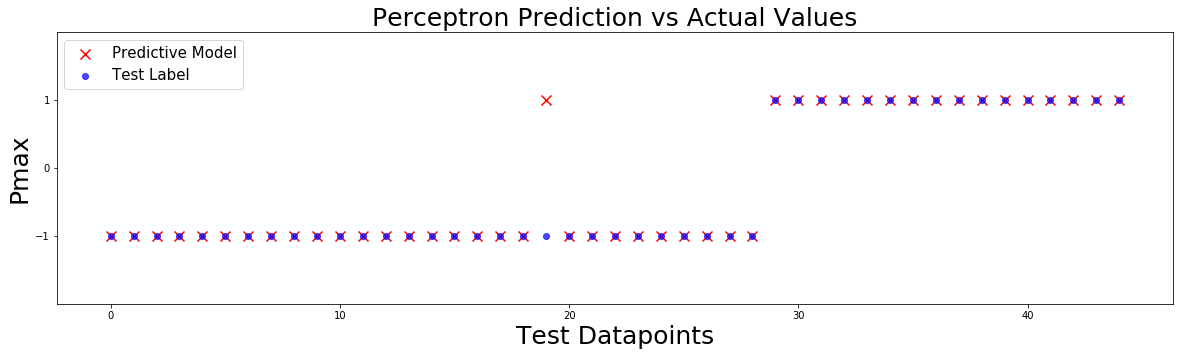

In [15]:
fig = plt.figure(figsize=(20,5))
plt.xlabel("Test Datapoints", fontsize = 25)
plt.ylabel("Pmax", fontsize = 25)
plt.title("Perceptron Prediction vs Actual Values", fontsize = 25)
plt.yticks(np.arange(min(pmax_pred), max(pmax_pred)+1, 1.0))
plt.ylim(-2, 2)

plt.scatter(index, pmax_pred, color = "r", label = "Predictive Model", marker = "x", s = 100)
plt.scatter(index, label, color = "b", alpha = 0.7, label = "Test Label")

plt.legend(loc = 2, prop = {"size" : 15})



plt.savefig("T_Perceptron_plot.png")